In [1]:
import numpy as np
import pandas as pd
import joblib
import shap
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from feature_settings import *
from train_models import Train_Models, MLPRegressor

In [2]:
whole_filepath = r"C:\Users\55479\PycharmProjects\MS_thesis\datasets\whole_df_all_features_simple_option_return.csv"
straddle_filepath = r"C:\Users\55479\PycharmProjects\MS_thesis\datasets\straddle_df_all_features_straddle_return.csv"

In [3]:
whole_models = Train_Models(whole_filepath, 'option_return')

In [4]:
linear_model = whole_models.linear()
print(f"=== The current trained model is {whole_models.model}")

y_train_pred = linear_model.predict(whole_models.get_X_train_scaled())
y_test_pred = linear_model.predict(whole_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = whole_models.metrics(whole_models.get_y_full_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = whole_models.metrics(whole_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is linear
🔹 Training Set Metrics:
R²:   0.1298
MSE:  1.3907
MAE:  0.2390
RMSE: 1.1793
MAPE: 84230968782.6755

🔹 Test Set Metrics:
R²:   0.1131
MSE:  1.3319
MAE:  0.3897
RMSE: 1.1541
MAPE: 308326076.8942



In [5]:
lasso_params = {
    "scaler": "standard",
    "alpha": 0.007867164207362786,
    "selection": "cyclic",
    "max_iter": 5000,
    "tol": 0.0002950705006956229,
    "fit_intercept": True,
    "random_state": 42,
    "copy_X": True,
    "warm_start": False,
    "precompute": False
}

lasso_model = whole_models.lasso(lasso_params)
print(f"=== The current trained model is {whole_models.model} ===")

y_train_pred = lasso_model.predict(whole_models.get_X_train_scaled())
y_test_pred = lasso_model.predict(whole_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = whole_models.metrics(whole_models.get_y_full_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = whole_models.metrics(whole_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is lasso ===
🔹 Training Set Metrics:
R²:   0.1281
MSE:  1.3934
MAE:  0.2322
RMSE: 1.1804
MAPE: 78821036644.2518

🔹 Test Set Metrics:
R²:   0.1126
MSE:  1.3326
MAE:  0.3774
RMSE: 1.1544
MAPE: 553174051.8350



In [6]:
ridge_params = {
    "scaler": "none",
    "alpha": 99.99820937798683,
    "fit_intercept": True,
    "solver": "auto",  # Let sklearn choose optimal solver
    "copy_X": True,
    "random_state": 42
}

ridge_model = whole_models.ridge(ridge_params)
print(f"=== The current trained model is {whole_models.model} ===")

y_train_pred = ridge_model.predict(whole_models.get_X_train_scaled())
y_test_pred = ridge_model.predict(whole_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = whole_models.metrics(whole_models.get_y_full_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = whole_models.metrics(whole_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is ridge ===
🔹 Training Set Metrics:
R²:   0.1294
MSE:  1.3913
MAE:  0.2385
RMSE: 1.1795
MAPE: 76412824146.1475

🔹 Test Set Metrics:
R²:   0.1145
MSE:  1.3299
MAE:  0.3833
RMSE: 1.1532
MAPE: 347667823.6604



In [7]:
elastic_params = {
    "scaler": "standard",
    "alpha": 0.00964313244812421,
    "l1_ratio": 0.8004036847036553,
    "max_iter": 9000,
    "tol": 0.0006076270344807669,
    "selection": "random",
    "fit_intercept": True,
    "positive": False,  # Set to False unless you have domain knowledge requiring positive coefficients
    "copy_X": True,  # Always copy to avoid data modification
    "precompute": False,  # Auto-handled by sklearn, manual setting can cause conflicts
    "warm_start": False,  # Not useful in hyperparameter optimization context
    "random_state": 42  # For reproducibility
}

elastic_model = whole_models.elastic(elastic_params)
print(f"=== The current trained model is {whole_models.model} ===")

y_train_pred = elastic_model.predict(whole_models.get_X_train_scaled())
y_test_pred = elastic_model.predict(whole_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = whole_models.metrics(whole_models.get_y_full_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = whole_models.metrics(whole_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is elastic ===
🔹 Training Set Metrics:
R²:   0.1281
MSE:  1.3934
MAE:  0.2322
RMSE: 1.1804
MAPE: 79442736619.6331

🔹 Test Set Metrics:
R²:   0.1127
MSE:  1.3325
MAE:  0.3773
RMSE: 1.1544
MAPE: 558632492.9335



In [8]:
xgb_params = {
    "scaler": "none",
    "learning_rate": 0.013352438101767016,
    "max_depth": 3,
    "subsample": 0.723011774539153,
    "min_child_weight": 7,
    "tree_method": "hist",
    "random_state": 42,
    "early_stopping_rounds": 50,
    "n_estimators": 10000,
}

xgb_model = whole_models.xgb(xgb_params)
print(f"=== The current trained model is {whole_models.model} ===")

y_train_pred = xgb_model.predict(whole_models.get_X_train_scaled())
y_test_pred = xgb_model.predict(whole_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = whole_models.metrics(whole_models.get_y_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = whole_models.metrics(whole_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is xgb ===
🔹 Training Set Metrics:
R²:   0.2222
MSE:  1.2326
MAE:  0.1549
RMSE: 1.1102
MAPE: 18517042122.5289

🔹 Test Set Metrics:
R²:   0.1483
MSE:  1.2791
MAE:  0.2693
RMSE: 1.1310
MAPE: 120602739.5274



In [9]:
lgb_params = {
    "scaler": "minmax",
    "num_leaves": 10,
    "learning_rate": 0.033836383649652135,
    "n_estimators": 50,
    "min_data_in_leaf": 78,
    "random_state": 42,
    "verbose": -1,
    "early_stopping_rounds": 50,
}


lgb_model = whole_models.lgb(lgb_params)
print(f"=== The current trained model is {whole_models.model} ===")

y_train_pred = lgb_model.predict(whole_models.get_X_train_scaled())
y_test_pred = lgb_model.predict(whole_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = whole_models.metrics(whole_models.get_y_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = whole_models.metrics(whole_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is lgb ===
🔹 Training Set Metrics:
R²:   0.2225
MSE:  1.2321
MAE:  0.2072
RMSE: 1.1100
MAPE: 96413277759.3516

🔹 Test Set Metrics:
R²:   0.1460
MSE:  1.2825
MAE:  0.3024
RMSE: 1.1325
MAPE: 294461541.7026



In [10]:
cat_params = {
    "scaler": "none",
    "depth": 6,
    "learning_rate": 0.29331893198010683,
    "iterations": 10,
    "l2_leaf_reg": 1.3380519218269793,
    "loss_function": "RMSE",  # Regression loss
    "eval_metric": "RMSE",   # Evaluation metric
    "random_seed": 42,
    "allow_writing_files": False,  # Don't write temp files
    "verbose": 0,
    "early_stopping_rounds": 50,
}


cat_model = whole_models.cat(cat_params)
print(f"=== The current trained model is {whole_models.model} ===")

y_train_pred = cat_model.predict(whole_models.get_X_train_scaled())
y_test_pred = cat_model.predict(whole_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = whole_models.metrics(whole_models.get_y_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = whole_models.metrics(whole_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is cat ===
🔹 Training Set Metrics:
R²:   0.5139
MSE:  0.7703
MAE:  0.1471
RMSE: 0.8777
MAPE: 16997707884.4195

🔹 Test Set Metrics:
R²:   0.1518
MSE:  1.2739
MAE:  0.2545
RMSE: 1.1287
MAPE: 422998002.7659



In [11]:
best_params = {
    "scaler": "standard",
    "num_layers": 3,
    "activation": "gelu",
    "first_layer_size": 256,
    "layer_1_ratio": 0.9899553178774205,
    "layer_2_ratio": 0.4694386900580503,
    "learning_rate": 0.001038500337992742,
    "batch_size": 32,
    "epochs": 500,
    "dropout_rate": 0.31676485538044735,
    "weight_decay": 4.0487788181534125e-05,
    "batch_norm": False,
    "optimizer": "RMSprop",
    "scheduler": "ReduceLROnPlateau"
}

X_train_scaled, X_val_scaled, X_test_scaled = whole_models.scale_transform_tree_nn(best_params)

hidden_layers = [best_params['first_layer_size']]
for i in range(1, best_params['num_layers']):
    layer_ratio = best_params.get(f'layer_{i}_ratio', 1.0)
    layer_size = max(16, int(hidden_layers[-1] * layer_ratio))
    hidden_layers.append(layer_size)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mlp_model = MLPRegressor(
    input_dim=X_train_scaled.shape[1],
    hidden_layers=hidden_layers,
    dropout_rate=best_params['dropout_rate'],
    batch_norm=best_params['batch_norm'],
    activation=best_params['activation']
).to(device)

mlp_model.load_state_dict(torch.load("whole_mlp_model.pth", map_location=device))

mlp_model.eval()
with torch.no_grad():
    # Convert entire test dataset to tensor
    X_test_tensor = torch.tensor(X_test_scaled.to_numpy(), dtype=torch.float32)
    y_test_pred = mlp_model(X_test_tensor)
    y_test_pred = y_test_pred.numpy()

with torch.no_grad():
    # Convert entire train dataset to tensor
    X_train_tensor = torch.tensor(X_train_scaled.to_numpy(), dtype=torch.float32)
    y_train_pred = mlp_model(X_train_tensor)
    y_train_pred = y_train_pred.numpy()

train_r2, train_mse, train_mae, train_rmse, train_mape = whole_models.metrics(whole_models.get_y_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = whole_models.metrics(whole_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

🔹 Training Set Metrics:
R²:   0.0361
MSE:  1.5275
MAE:  0.2488
RMSE: 1.2359
MAPE: 199306490737.1925

🔹 Test Set Metrics:
R²:   -0.0451
MSE:  1.5695
MAE:  0.3658
RMSE: 1.2528
MAPE: 2443582513.0509



In [12]:
straddle_return_mean = whole_models.y_train.mean()
y_train_pred = np.full(len(whole_models.get_y_train()), straddle_return_mean)
y_test_pred = np.full(len(whole_models.get_y_test()), straddle_return_mean)

train_r2, train_mse, train_mae, train_rmse, train_mape = whole_models.metrics(whole_models.get_y_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = whole_models.metrics(whole_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

🔹 Training Set Metrics:
R²:   0.0000
MSE:  1.5847
MAE:  0.5514
RMSE: 1.2589
MAPE: 516751808627.4227

🔹 Test Set Metrics:
R²:   -0.0014
MSE:  1.5038
MAE:  0.6017
RMSE: 1.2263
MAPE: 1116275627.6362



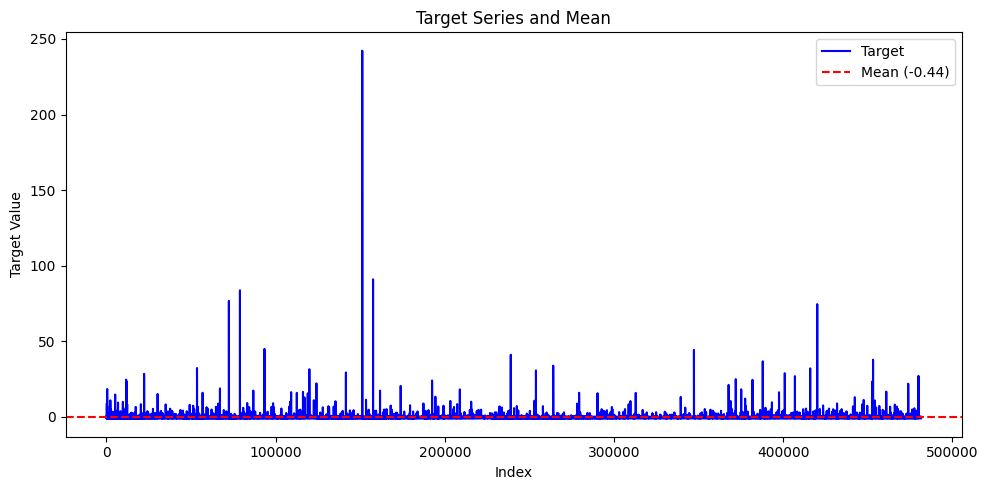

In [13]:
# Suppose y is your target pd.Series
# Example: y = pd.Series(np.random.randn(100))
y = whole_models.y

plt.figure(figsize=(10, 5))

# Plot the target series
plt.plot(y.index, y.values, label='Target', color='blue')

# Plot the mean as a horizontal line
mean_y = y.mean()
plt.axhline(mean_y, color='red', linestyle='--', label=f'Mean ({mean_y:.2f})')

plt.title('Target Series and Mean')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
X = np.ones(len(y))  # Only the constant

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          option_return   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 19 Jul 2025   Prob (F-statistic):                nan
Time:                        00:56:16   Log-Likelihood:            -7.9335e+05
No. Observations:              481592   AIC:                         1.587e+06
Df Residuals:                  481591   BIC:                         1.587e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4414      0.002   -243.755      0.0

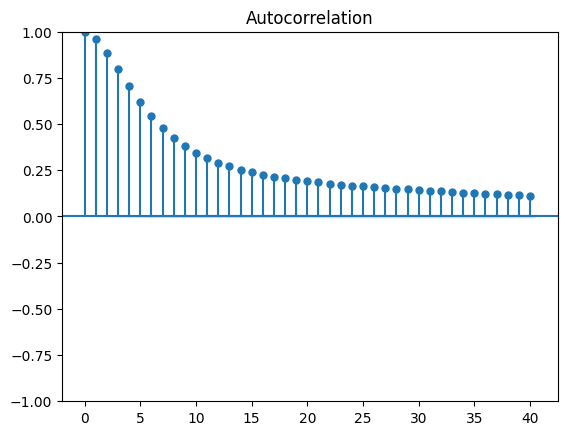

In [15]:
plot_acf(y, lags=40)
plt.show()